### Лабораторна робота №1 - Налаштування оточення розробки. Знайомство з фреймворком PyTorch.

1. Виконати налаштування робочої середи;

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# if torch.cuda.is_available():
#   tensor = torch.tensor.to('cuda')
#   print(f"Device tensor is stored on: {tensor.device}")

2. Встановити сід генератору псевдовипадкових чисел;

In [2]:
torch.manual_seed(0)

3. Завантажити обраний набір даних;
5. Розділити обраний набір даних на три вибірки: тренувальну, валідаційну та тестову. Співвідношення розміру вибірок обрати на власний розсуд;

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor


batch_size= 20

train_set = datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=ToTensor())
train_set, val_set = torch.utils.data.random_split(train_set, [0.8, 0.2])

test_set = datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=ToTensor())
print('train set:', len(train_set))
print('val set:', len(val_set))
print('test set', len(test_set))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



100%|██████████| 170M/170M [00:08<00:00, 20.5MB/s] 


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified
train set: 40000
val set: 10000
test set 10000


4. Відобразити декілька зображень з набору даних у блокноті;

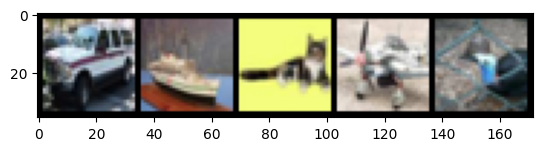

car ship cat plane bird


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:5]))
print(' '.join(f'{classes[labels[j]]}' for j in range(5)))

6. Завантажити та налаштувати нейронну мережу обраної архітектури;

In [5]:
from torchvision.models.vgg import VGG, make_layers
from torchvision.models.vgg import cfgs

config = cfgs['A']  # 'D' corresponds to VGG-16 configuration
features = make_layers(config)

model = VGG(features, num_classes=len(classes)).to(device)


7. Провести навчання нейронної мережі. Вибір гіперпараметрів на власний розсуд;

In [6]:
from torch import nn

num_epochs = 10
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

In [7]:
from tqdm import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_step = len(train_loader)
losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    progress_bar = tqdm(enumerate(train_loader, 1), desc=f"Epoch {epoch+1}/{num_epochs}", leave=True, total=len(train_loader))
    for step, (images, labels) in progress_bar:  
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        progress_bar.set_postfix(loss=running_loss/(batch_size*(step+1)))

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_accuracy = 100. * correct_val / total_val

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Epoch 1/10: 100%|██████████| 2000/2000 [00:43<00:00, 46.13it/s, loss=0.11] 


Train Loss: 2.2064, Train Accuracy: 16.05%
Validation Loss: 2.0215, Validation Accuracy: 24.98%


Epoch 2/10: 100%|██████████| 2000/2000 [00:44<00:00, 44.60it/s, loss=0.096]  


Train Loss: 1.9210, Train Accuracy: 26.09%
Validation Loss: 1.8785, Validation Accuracy: 27.85%


Epoch 3/10: 100%|██████████| 2000/2000 [00:43<00:00, 46.41it/s, loss=0.0871] 


Train Loss: 1.7421, Train Accuracy: 32.66%
Validation Loss: 1.7129, Validation Accuracy: 36.62%


Epoch 4/10: 100%|██████████| 2000/2000 [00:45<00:00, 44.39it/s, loss=0.0811] 


Train Loss: 1.6230, Train Accuracy: 38.17%
Validation Loss: 1.5430, Validation Accuracy: 40.77%


Epoch 5/10: 100%|██████████| 2000/2000 [00:43<00:00, 46.29it/s, loss=0.0763] 


Train Loss: 1.5267, Train Accuracy: 43.21%
Validation Loss: 1.5304, Validation Accuracy: 44.61%


Epoch 6/10: 100%|██████████| 2000/2000 [00:45<00:00, 44.03it/s, loss=0.0715] 


Train Loss: 1.4298, Train Accuracy: 48.04%
Validation Loss: 1.4110, Validation Accuracy: 49.25%


Epoch 7/10: 100%|██████████| 2000/2000 [00:43<00:00, 46.39it/s, loss=0.0676] 


Train Loss: 1.3524, Train Accuracy: 51.70%
Validation Loss: 1.3268, Validation Accuracy: 52.11%


Epoch 8/10: 100%|██████████| 2000/2000 [00:45<00:00, 44.21it/s, loss=0.0646] 


Train Loss: 1.2934, Train Accuracy: 54.71%
Validation Loss: 1.3742, Validation Accuracy: 53.54%


Epoch 9/10: 100%|██████████| 2000/2000 [00:43<00:00, 46.50it/s, loss=0.0621] 


Train Loss: 1.2420, Train Accuracy: 56.25%
Validation Loss: 1.1720, Validation Accuracy: 58.96%


Epoch 10/10: 100%|██████████| 2000/2000 [00:45<00:00, 44.16it/s, loss=0.0605] 


Train Loss: 1.2096, Train Accuracy: 57.74%
Validation Loss: 1.3278, Validation Accuracy: 52.53%


In [8]:
running_loss = 0.0
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_loss = running_loss / len(test_loader)
test_accuracy = 100. * correct_test / total_test

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Test loss: 1.151496171951294
Test accuracy: 53.03


8. Побудувати графіки точності та loss мережі під час навчання

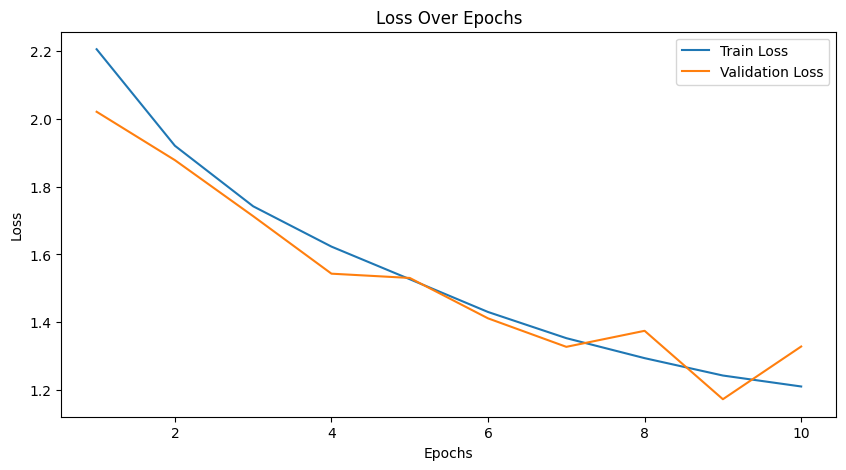

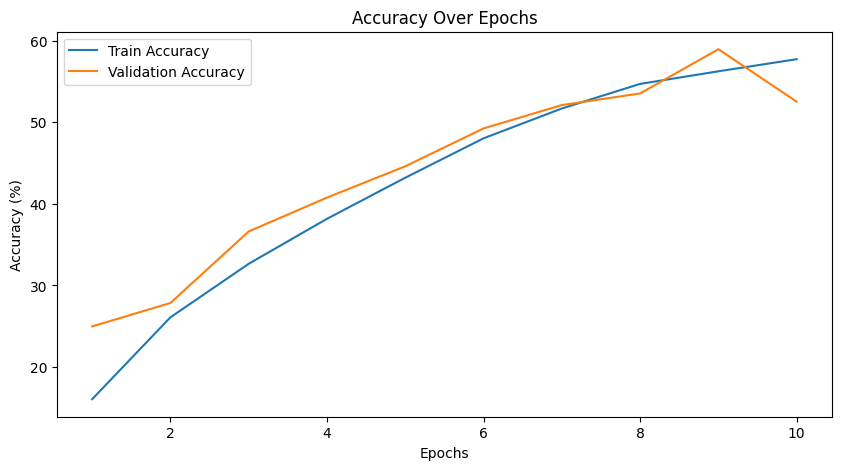

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

9. Зберегти ваги навченої нейронної мережі у файл

In [10]:
torch.save(model.state_dict(), '../models/lab1_model_weights.pth')

10. Висновки

У ході лабораторної роботи ми ознайомились з бібліоткеою Pytorch та її модулями:
1. datasets та DataLoader для швидкого і зручного завантаження відомого датасету зображень;
2. torchvision.models для створення моделі VGG
3. autograd та tensor

Також скористались перевагою паралельних обчислень з GPU.